# -------------------------
## 3. Estadística Inferencial
# --------------------------

## 3.1 Estimador Máximo Verosímil

Existen distintos métodos para estimar parámetros desconocidos a partir de un conjunto de datos. El Estimador Máximo Verosímil (MLE) responde a la siguiente pregunta:

¿Para qué valor del parámetro, los datos observados tienen la probabilidad más alta?

**Ejemplo 1** Una moneda se lanza 100 veces. Dado que se obtienen 55 soles, econtrar el MLE para la probabilidad $p$ de obtener sol en un sólo lanzamiento,

Podemos pensar en contar el número de soles en los 100 lanzamientos, entonces la probabilidad de obtener 55 soles en este experimento, es la siguiente:

Si $X:$ el numero de soles que se obtienen al lanzar una moneda, se tiene que $X\sim Bin(100,p)$, es decir, 

$$ P(55 soles; p) = \binom{100}{55}p^{55}(1-p)^{100-55} $$


**Función de verosímilitud.** Sea $X_1,X_2,\dots,X_n$ una muestra aleatoria con $f(x;\theta)$. La función de verosimilitud (likelihood) es:
$$ f(x_1,\dots,x_n;\theta) = f(x_1;\theta)\cdots f(x_n;\theta) $$
Entpnces, 
$$ L(x_1,\dots,x_n;\theta) = \prod_{i=1}^n f(x_i,\theta) $$

Ejemplo. Si $X_1,\dots,X_n$ es una m.a. Poisson($\lambda$), entonces
$$ L(x_1,\dots,x_n;\lambda) = \frac{e^{-n\lambda} \lambda^{\sum x_i }}{\prod x_i !}$$ 

**Estimador Máximo Verosímil** es el valor de $\theta$, donde $L(x_1,\dots,x_n;\theta)$ alcanza el máximo.

Pasos: 

- $$ L(x_1,\dots,x_n;\theta) = \prod_{i=1}^n f(x_i,\theta) $$
- $$\ln L(x_1,\dots,x_n;\theta) $$
- $$ \frac{d\ln L(x_1,\dots,x_n;\theta)}{d\theta} $$
- $$ \frac{d\ln L(x_1,\dots,x_n;\theta)}{d\theta} = 0 $$
  y despejar $\theta$ para encontrar el máximo.

Para nuestro caso, tenemos
$$ \frac{P(55 soles ;p)}{dp}=\binom{100}{55}p^{55}(1-p)^{45} - 45p^{55}(1-p)^44=0$$
entonces, resolviendo para $p$, se tiene
$$ \binom{100}{55}p^{55}(1-p)^{45}=45^{55}(1-p)^44 $$
entonces,
$$ 55(1-p) = 45p $$
entonces, 
$$p = \frac{55}{100}$$

Por lo tanto, el MLE para $p$, es $\hat{p}=0.55$

In [16]:
from scipy.stats import bernoulli, binom 
import numpy as np
import sympy # para calculo simbolico y algebraico -> encontra el estimador de maneta analítica
from sympy.abc import x

# Definir a p como una variable simbolica positiva

p = sympy.symbols('p', positive = True )
f = p**55 * (1-p)**(100-55)
phat = sympy.solve(sympy.diff(f,p),p)[0]

print("Es estimador de máxima verosimilitud es", phat)

Es estimador de máxima verosimilitud es 11/20


Veamos otro ejemplo:

In [72]:
r = binom.rvs(1,0.7, size=100)
r

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [70]:
f = p**x*(1-p)**(1-x)
J = np.prod([f.subs(x,i) for i in r])
logJ = sympy.expand_log(sympy.log(J)) #logaritmo
phat = sympy.solve(sympy.diff(logJ,p),p)[0]
print("Es estimador de máxima verosimilitud es", phat)

Es estimador de máxima verosimilitud es 63/100


## Ejercicios

$\textcolor{red}{Ejercicio \space 1}$

 El tiempo de retardo para pacientes con enfermedad coronaria potencial se define como la duración entre el comienzo de un síntoma agudo cardiovascular y la llegada a la unidad de emergencia.

Se supone que el tiempo de retardo sigue una distribución exponencial con parámetro $\theta $.

Se registraron los tiempos de retardo (en minutos) en la clínica para los primeros 20 pacientes:

$$ 525, \ 719, \ 2880, \ 150, \ 30, \ 251, \ 45, \ 858, \ 15, \ 47, \ 90, \ 56, \ 68, \ 6, \ 189, \ 180, \ 60, \ 60, \ 294, \ 747 $$

- Encuentra un estimador por el método de momentos para la media de la distribución.
- Encuentra el valor del estimador con los datos dados.

Solución

- Encuentra un estimador por el método de momentos para la media de la distribución.
  
 Si $X\sim Exp(\theta)$, sabemos que $E[x]=\theta$ entonces igualando $E[x]=\frac{1}{n}\sum x_i$

 Igualamos $\theta=\frac{1}{n}\sum x_i$

 $\theta=\bar{x}$, entonces: $ \hat{\theta}=\bar{x}$

- Encuentra el valor del estimador con los datos dados.
  
$ \hat{\theta}=\bar{x}=\frac{7210}{20}$


$\textcolor{red}{Ejercicio  \space 2}$

Ejercicio. Sea una muestra aleatoria $X_1, \ldots, X_n \overset{iid}{\sim} \mathcal{N}(\mu, \sigma^2) $.
Queremos encontrar el estimador de máxima verosimilitud para $\mu$ y $\sigma^2$.

La función de densidad es:
$$ f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) \cdot \mathbf{1}_{(-\infty, \infty)}(x)$$

- Solución
  
Dado un conjunto de datos $X = \{x_1, x_2, \dots, x_n\}$ que siguen una distribución normal $N(\mu, \sigma^2)$, la función de verosimilitud es el producto de las densidades individuales:

$
L(\mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right).$

Tomamos el logaritmo de la verosimilitud:

$
\ln L(\mu, \sigma^2) = \sum_{i=1}^{n} \left[ -\frac{1}{2} \ln(2\pi\sigma^2) - \frac{(x_i - \mu)^2}{2\sigma^2} \right].$

$
\ln L(\mu, \sigma^2) = -\frac{n}{2} \ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2.$

Estimador de $\mu$
Derivamos respecto a $\mu$:
$
\frac{\partial \ln L}{\partial \mu} = -\frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu).$

Igualamos a cero:
$\sum_{i=1}^{n} (x_i - \mu) = 0$

$\mu = \frac{1}{n} \sum_{i=1}^{n} x_i.$

Por lo tanto, el estimador de máxima verosimilitud de $\mu$ es la media muestral:
$\hat{\mu} = \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i.$
Estimador de $\sigma^2$
Derivamos respecto a $\sigma^2$:
$\frac{\partial \ln L}{\partial \sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{n} (x_i - \mu)^2$

Igualamos a cero:
$-\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{n} (x_i - \mu)^2 = 0$

Multiplicamos por $2\sigma^4$:
$-n\sigma^2 + \sum_{i=1}^{n} (x_i - \mu)^2 = 0$
$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2$

Por lo tanto, el estimador de máxima verosimilitud de $\sigma^2$ es:
$\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$

Los estimadores de máxima verosimilitud para la distribución normal son:

  $\hat{\mu} = \bar{x},  \space   $       $  \space  \space   \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$


$\textcolor{red}{Ejercicio  \space 3}$

Ejercicio (Pyton). Suponga que la vida util de los focos de cierta marca, se modela mediante una distribución expoencial de parametro $\theta$ (desconocido). Probamos 5 focos y encontramos que tienen una vida útil de $2,3,1,3$ y $5$ años, respectivamente. ¿Cuál es el MLE para $\theta$?

In [117]:
import sympy
import numpy as np

# Datos de la muestra
datos = [2, 3, 1, 3, 5]

# Definir el parámetro theta como variable simbólica
theta = sympy.symbols('theta')

# Función de verosimilitud para la distribución exponencial
# L(theta) = (1/theta)^n * exp(-1/theta * sum(x_i))
n = len(datos)
suma_datos = sum(datos)

# Logaritmo de la función de verosimilitud
logL = n * sympy.log(theta) + (1/theta) * suma_datos

# Derivada de la log-verosimilitud con respecto a theta
derivada_logL = sympy.diff(logL, theta)

# Resolver para theta al igualar la derivada a cero
theta_mle = sympy.solve(derivada_logL, theta)[0]

# Mostrar el estimador MLE
print(f"El estimador de máxima verosimilitud para theta es: {theta_mle}")


El estimador de máxima verosimilitud para theta es: 14/5


$\textcolor{red}{Ejercicio  \space 4}$

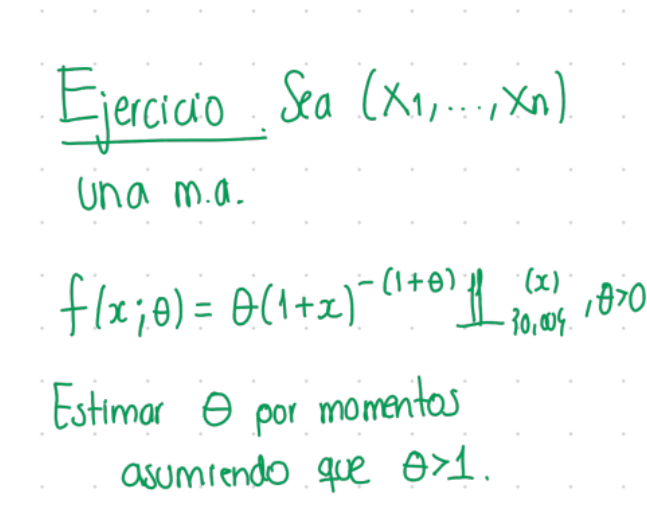

Solución 

Sabemos que, $f(x) = \theta (1 + x)^{-(1 + \theta)}, \quad x \geq 0, \, \theta > 1$

$ E[X]$ se calcula como:

$
E[X] = \int_0^\infty x \cdot f(x) \, dx$

Sustituyendo la función de densidad $ f(x) $:

$
E[X] = \int_0^\infty x \cdot \theta (1 + x)^{-(1 + \theta)} \, dx$

Hacemos el cambio de variable $ u = 1 + x $, de modo que $ du = dx $ y $x = u - 1 $. La integral se convierte en:

$E[X] = \int_1^\infty (u - 1) \cdot \theta u^{-(1 + \theta)} \, du$

Distribuimos:

$E[X] = \theta \left( \int_1^\infty u^{-(\theta)} \, du - \int_1^\infty u^{-(1 + \theta)} \, du \right)$

Las integrales conocidas son:

$
\int_1^\infty u^{-\theta} \, du = \frac{1}{\theta}, \quad \int_1^\infty u^{-(1 + \theta)} \, du = \frac{1}{\theta + 1}$

Por lo tanto, el valor esperado es:

$
E[X] = \theta \left( \frac{1}{\theta} - \frac{1}{\theta + 1} \right)
$

Simplificando:

$
E[X] = 1 - \frac{\theta}{\theta + 1}$

$
E[X] = \frac{1}{\theta - 1}
$


Si $E[x]=\frac{1}{n}\sum x_i$

Igualamos $\frac{1}{n}\sum x_i =\frac{1}{\theta -1}$

$\bar{x} =\frac{1}{\theta - 1}$

$\hat{\theta}=\frac{1}{\bar{x}}+1$

# 3.2 Intervalos de Confianza

El intervalo de confianza es un intervalo que da una aproximación de los valores entre los cuales se encuentra el valor de un parámetro poblacional con un determinado nivel de confianza

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Intervalo de Confianza para la media de una distribución normal (σ conocida)

Sea $X_1, \dots, X_n$ una m.a. $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Entonces:

- $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$
- $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1)$

### Nivel de significancia (error): $\alpha$

El intervalo de confianza se basa en que:
$$
\mathbb{P}\left( -z_{\alpha/2} < \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} < z_{\alpha/2} \right)
= \mathbb{P}\left( \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right)
= 1 - \alpha
$$

### El intervalo del $(1 - \alpha) \cdot 100\%$ de confianza para $\mu$ (con $\sigma$ conocida) es:

$$
\left( \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}}, \quad \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right)
$$
donde

- $\sigma$ = desviación estándar  
- $\frac{\sigma}{\sqrt{n}}$ = error estándar de la media  
- $z_{\alpha/2}$ determina el nivel de confianza  
- El intervalo está centrado en $\bar{X}$

**Observación**

- A mayor $n$, menor es el error estándar, y el intervalo de confianza es más pequeño.
- Esto hace que se acerque más a la media $\mu$, es decir, que haya menor variación.


**Ejemplo 1** Para tratar de estimar la media de consumo por cliente en un gran restaurante, se reunieron datos de una muestra de 49 clientes durante 3 semanas.

**a)** Supongamos que la **desviación estándar de la población** es de $\$2.50$. ¿Cuál es el error estándar de la media?

**b)** Con un nivel de confianza del $95\%$, ¿cuál es el margen de error?

**c)** Si la **media de la muestra** es de $\$22.60$, cuál es el intervalo de confianza del $95\%$ para la media de la población?

In [13]:
# Datos
n=49
sigma = 2.50
media_muestral = 22.60 
confianza = 0.95

# a) Error estándar de la media
error_estandar = sigma / np.sqrt(n)
#error_estandar
print(f" a) Error estándar de la media: {error_estandar:.2f}")

# b) Margen de error
z = st.norm.ppf(1-(1-confianza) / 2)
margen_error = z * error_estandar
#margen_error
print(f" b) Margen de error con 95% de confianza: {margen_error:.2f}")

# c) 
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error
print(f" c) Intervalo de confianza del 95%: ({limite_inferior:.2f},{limite_superior:.2f})")

 a) Error estándar de la media: 0.36
 b) Margen de error con 95% de confianza: 0.70
 c) Intervalo de confianza del 95%: (21.90,23.30)


$1-\alpha=.95$, implica que $z_{\alpha/2} = z_{0.025} = 1.96$

**Ejemplo 2** Supongamos que se toma una muestra aleatoria de 100 personas para estimar la media del peso de una población, y se obtiene que la media 

In [19]:
# Datos
n = 100
media_muestral = 70
sigma = 10
nivel_confianza = 0.95
error_estandar = sigma / np.sqrt(n)

#Utilizaremos la función scipy.stats.norm.interval
# Sintaxis
# scipy.stats.norm.interval(confidence, loc = media, scale = error_estandar )

intervalo = st.norm.interval(confidence = nivel_confianza, loc = media_muestral, scale = error_estandar)
print(f"Intervalo de confianza del 95% es: {intervalo}")


Intervalo de confianza del 95% es: (68.04003601545995, 71.95996398454005)


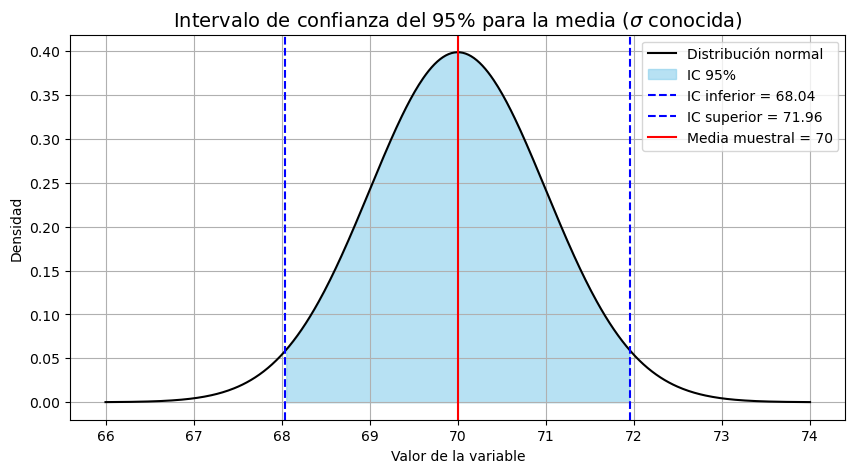

In [21]:
# Puntos para graficar la curva normal
x = np.linspace(media_muestral - 4*error_estandar, media_muestral + 4*error_estandar, 500)
y = st.norm.pdf(x, loc=media_muestral, scale=error_estandar)

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Distribución normal', color='black')

# Sombrear el intervalo de confianza
plt.fill_between(x, y, where=(x >= intervalo[0]) & (x <= intervalo[1]), color='skyblue', alpha=0.6, label='IC 95%')

# Líneas verticales
plt.axvline(intervalo[0], color='blue', linestyle='--', label=f'IC inferior = {intervalo[0]:.2f}')
plt.axvline(intervalo[1], color='blue', linestyle='--', label=f'IC superior = {intervalo[1]:.2f}')
plt.axvline(media_muestral, color='red', linestyle='-', label=f'Media muestral = {media_muestral}')

plt.title('Intervalo de confianza del 95% para la media ($\\sigma$ conocida)', fontsize=14)
plt.xlabel('Valor de la variable')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

## Intervalo de Confianza para la media $\mu$ de una distribución normal ($\sigma$ deconocida)

Sea $X_1, \dots, X_n$ una m.a. $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Entonces:

- $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$
- $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1)$

Si el tamaño de la muestra es menor a 30, se utiliza la $t$: 
### Estadístico t

Definimos el estadístico $t$ de la siguiente manera:
$$T = \frac{\bar{X}-\mu}{s/\sqrt{n}} \sim t_{(n-1)} $$

### El intervalo del $(1 - \alpha) \cdot 100\%$ de confianza para $\mu$ (con $\sigma$ desconocida) es:

$$
\left( \bar{X} - t_{\alpha/2} \frac{s}{\sqrt{n}}, \quad \bar{X} + t_{\alpha/2} \frac{s}{\sqrt{n}} \right)
$$
donde

- $s$ = desviación estándar muestral
- $\frac{s}{\sqrt{n}}$ = error estándar de la media  
- $t_{\alpha/2}$ determina el nivel de confianza  
- El intervalo está centrado en $\bar{X}$

**Ejemplo 3** Supongamos que tenemos los siguientes datos
$$ datos = [45, 55, 67, 45, 68, 79, 98, 87, 84, 82] $$
Calcular un intervalo de confianza para la media.

In [25]:
# Datos del ejemplo 
data = [45, 55, 67, 45, 68, 79, 98, 87, 84, 82]
confidence = 0.95
gl = len(data) - 1 # grados de liber

# Media y error estandar
mean = np.mean(data)
error_est = st.sem(data)

# Intervalo de confianza usando t de Student
intervalo = st.t.interval(confidence, gl, loc = mean, scale = error_est)

print(f"Media muestral: {mean:.2f}")
print(f"Error estandar: {error_est:.2f}")
print(f"El intervalo de confianza del 95% es: {intervalo}")


Media muestral: 71.00
Error estandar: 5.75
El intervalo de confianza del 95% es: (58.000521742293884, 83.99947825770612)


**Ejemplo 4** Los artículos de cerámica utilizados sobre velas electricas sobrecargadas se rompen con diferentes presiones. Supongamos que los datos provienen de una distribución normal.

La resistencia a la ruptura fue medida en una muestra de 100 artículos, y el promedio fue de $1750$ con un desviación estándar de 315.8

**a)** Estimar con un nivel del confianza del $90\%$ a la media poblacional de la presión de la ruptura.

**b)** Estimar con un nivel del confianza del $90\%$ a la varianza poblacional.

In [28]:
from scipy.stats import chi2
# datos
n = 100
media_muestral = 1750
desv_estandar_muestral = 315.8
confianza = 0.90

# a) Usar la normal ya que el tamaño de la muestra es grande
error_est = desv_estandar_muestral / np.sqrt(n)
error_est
intervalo_media = st.norm.interval(confidence=confianza, loc = media_muestral, scale = error_est)
print(f"El intervalo de confianza del 90% es: {intervalo_media}")

# b) Intervalo de confianza para la varianza (usar chi-cuadrada)
alpha = 1-confianza
gl = n-1
s2 = desv_estandar_muestral**2

#Cuantiles de la chi-cuadrada
chi2_inf = st.chi2.ppf(alpha / 2,df=gl)
chi2_sup = st.chi2.ppf(1- alpha / 2,df=gl)

# Intervalo de confianza
intervalo_varianza = ((gl * s2) / chi2_sup, (gl * s2) / chi2_inf )
print(f"El intervalo de confianza del 90% es: {intervalo_varianza}")

#Otra forma
chi2_low, chi2_high = chi2.interval(confianza,df=gl)
intervalo_varianza1 = ((gl * s2) / chi2_high, (gl * s2) / chi2_low )
print(f"El intervalo de confianza del 90% es: {intervalo_varianza1}")


El intervalo de confianza del 90% es: (1698.0555224608725, 1801.9444775391275)
El intervalo de confianza del 90% es: (80123.48643850331, 128146.71537457063)
El intervalo de confianza del 90% es: (80123.48643850331, 128146.71537457063)


**Ejemplo**  El artículo *"Evaluation of a Ventilation Strategy to Prevent Barotrauma in Patients at High Risk for Acute Respiratory Distress Syndrome"* reportó sobre un experimento con 120 pacientes con anestesistas en cuidados intensivos (UCI), los cuales fueron divididos al azar en dos grupos, donde cada uno esta compuesto por 60 pacientes. 

- Grupo A: promedio de permanencia = 14.1 horas
- Grupo B: promedio de permanencia = 17.5 horas
- Desviación estándar en ambos = 5.1 hrs

Encontrar un intervalo del $95\%$ de confianza para la diferecia de medias poblacionales: $(\mu_A - \mu_B)$  

In [31]:
#Datos 
n1 = 60
n2 = 60
media1 = 14.1
media2 = 17.5
sigma = 5.1
confianza = 0.95
alpha = 1-confianza
#gl = n1 + n2 -2

#valor critico
z = st.norm.ppf(1 - alpha / 2)

#Error estandar
error_est = sigma * np.sqrt(1/n1 + 1/n2)
dif_medias = media1 - media2
margen_error = z *error_est

lim_inf = dif_medias - margen_error
lim_sup = dif_medias + margen_error
print(f"Diferencia de las medias: {dif_medias:.2f}")
print(f"Intervalo de confianza del 95%: ({lim_inf:.2f},{lim_sup:.2f})")

Diferencia de las medias: -3.40
Intervalo de confianza del 95%: (-5.22,-1.58)


##  Ejercicios IC


**1. Ejercicio** En una encuesta de una Universidad, 225 estudiantes son seleccionados al azar de los que toman cálculo y se les pregunta si cálculo es su materia favorita. 100 estudiantes responden que el cálculo es su materia favorita. Proporcione un intervalo de confianza del 95 %  para la proporción de todos los estudiantes que toman cálculo y que la consideran su materia favorita.  

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statistics




De acuerdo al libro Mendenhall, tenemos que la formúla para la estimación de intervalos de una muestra grande para una sola proporción poblacional $p$, con base en $Y$, el número de éxitos observados durante $n$ intentos en un experimento binomial es:

$IC = \hat{p}\pm  Z_{\alpha/2}  \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$

 $\hat{p}$ es la proporción de estudiantes que dijeron que cálculo es su materia favorita (en este caso, $\hat{p} = \frac{100}{225} = 0.4444$).
 $n$ es el tamaño de la muestra (en este caso, $n = 225$).
 $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para un intervalo de confianza del 95\%. Para un intervalo del 95\%, el valor  es aproximadamente 1.96.

In [37]:
import math
import scipy.stats as stats

# Datos proporcionados
n = 225  # Tamaño de la muestra
x = 100  # Número de estudiantes que consideran cálculo su materia favorita
p_hat = x / n  # Proporción muestral

# Nivel de confianza del 95% (Zα/2)
Z = stats.norm.ppf(0.975)

# Error estándar
SE = math.sqrt(p_hat * (1 - p_hat) / n)

# Margen de error
ME = Z * SE

# Intervalo de confianza
ci_lower = p_hat - ME
ci_upper = p_hat + ME

# Resultados
ci_lower, ci_upper


(0.37951684884617914, 0.5093720400427098)

**2. Ejercicio** Los datos $1.2,\ 2.1,\ 2.3,\ 1.9,\ 3.0,\ 1.5,\ 2.8,\ 2.4,\ 1.7,\ 2.6,\ 2.0,\ 1.8,\ 3.1,\ 2.2,\ 2.5$ se toman a partir de una distribución normal $N(\mu,\sigma^2)$ con $\mu$ desconocida.

**a)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\mu$, dado que $\sigma =2$.

**b)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\mu$.

**c)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\sigma^2$.

In [44]:
#A)
# Datos
n = 15
datos = [1.2, 2.1, 2.3, 1.9, 3.0, 1.5, 2.8, 2.4, 1.7, 2.6, 2.0, 1.8, 3.1, 2.2, 2.5]

# Calcular el promedio
media_muestral = statistics.mean(datos)

sigma = 2
nivel_confianza = 0.90
error_estandar = sigma / np.sqrt(n)
error_estandar
intervalo = st.norm.interval(confidence = nivel_confianza, loc = media_muestral, scale = error_estandar)
print(f" A) Intervalo de confianza del 90% es: {intervalo}")         

#B)
# Datos del ejemplo 

confidence = 0.90
gl = len(datos) - 1 # grados de liber

# Media y error estandar
mean = np.mean(datos)
error_est = st.sem(datos)

# Intervalo de confianza usando t de Student
intervalo = st.t.interval(confidence, gl, loc = mean, scale = error_est)


print(f"b) El intervalo de confianza del 90% es: {intervalo}")

## C)

alpha = 1-nivel_confianza
gl = n-1
import math

# Calcular el promedio
promedio = sum(datos) / len(datos)

# Calcular la desviación estándar

desv_estandar_muestral = np.std(datos, ddof=1)
s2 = desv_estandar_muestral**2

#Cuantiles de la chi-cuadrada
chi2_inf = st.chi2.ppf(alpha / 2,df=gl)
chi2_sup = st.chi2.ppf(1- alpha / 2,df=gl)

# Intervalo de confianza
intervalo_varianza = ((gl * s2) / chi2_sup, (gl * s2) / chi2_inf )
print(f" c) El intervalo de confianza del 90% es: {intervalo_varianza}")


 A) Intervalo de confianza del 90% es: (1.3572679061157438, 3.056065427217589)
b) El intervalo de confianza del 90% es: (1.9590867859121577, 2.4542465474211754)
 c) El intervalo de confianza del 90% es: (0.17518977811239209, 0.6314968974778152)


     
**3. Ejercicio** Los ingresos semanales promedio de las personas que trabajan en varias industrias aparecieron en el *The New York Times 1988 Almanac*.  
Esos ingresos para quienes trabajan en los servicios fueron de $\$369$. Suponga que este resultado se basó en una muestra de 250 personas dedicadas a los servicios y que la desviación estándar de la muestra fue de $\$50$. Calcula el intervalo de confianza del 95% para la media de la población de ingresos semanales de personas que trabajan en los servicios.

In [47]:
# Datos
n = 250
media_muestral = 369
sigma = 50
nivel_confianza = 0.95
error_estandar = sigma / np.sqrt(n)

#Utilizaremos la función scipy.stats.norm.interval
# Sintaxis
# scipy.stats.norm.interval(confidence, loc = media, scale = error_estandar )

intervalo = st.norm.interval(confidence = nivel_confianza, loc = media_muestral, scale = error_estandar)
print(f"Intervalo de confianza del 95% es: {intervalo}")

Intervalo de confianza del 95% es: (362.80204967695437, 375.19795032304563)


**4. Ejercicio** En un estudio de préstamos a estudiantes, el Departamento de Educación informó que los beneficiarios del fondo Stafford Loan deberían un promedio de \$12,658 al recibirse (*USA Today*, 5 de abril de 1995). Suponga que este promedio de deuda se basa en una muestra de 480 préstamos a estudiantes y que la desviación estándar de la población de las deudas al recibirse es \$2,000.

**a)** Determina un estimado de confianza del **90%** del promedio poblacional de la deuda.

**b)** Determina un estimado de confianza del **95%** del promedio poblacional de la deuda.

**c)** Determina un estimado de confianza del **99%** del promedio poblacional de la deuda.

**d)** Describe lo que sucede con el **ancho del intervalo de confianza** a medida que se **aumenta el nivel de confianza**. ¿Parece razonable? Explica tu respuesta.

In [50]:
# a)
# Datos
n = 480
media_muestral = 12658
sigma = 2000
nivel_confianza = 0.90
error_estandar = sigma / np.sqrt(n)

#Utilizaremos la función scipy.stats.norm.interval
# Sintaxis
# scipy.stats.norm.interval(confidence, loc = media, scale = error_estandar )

intervalo = st.norm.interval(confidence = nivel_confianza, loc = media_muestral, scale = error_estandar)
print(f"a) Intervalo de confianza del 90% es: {intervalo}")


## B)


# Datos

nivel_confianza_b = 0.95
error_estandar = sigma / np.sqrt(n)

#Utilizaremos la función scipy.stats.norm.interval
# Sintaxis
# scipy.stats.norm.interval(confidence, loc = media, scale = error_estandar )

intervalo = st.norm.interval(confidence = nivel_confianza_b, loc = media_muestral, scale = error_estandar)
print(f" b)Intervalo de confianza del 95% es: {intervalo}")


## C)


# Datos

nivel_confianza_b = 0.99
error_estandar = sigma / np.sqrt(n)

#Utilizaremos la función scipy.stats.norm.interval
# Sintaxis
# scipy.stats.norm.interval(confidence, loc = media, scale = error_estandar )

intervalo = st.norm.interval(confidence = nivel_confianza_b, loc = media_muestral, scale = error_estandar)
print(f" C)Intervalo de confianza del 99% es: {intervalo}")

print(f" D) Conclusión a medida que el nivel de confianza se hace más grande tambien lo hace el intervalo de confianza, esto es  por que estamos expandiendo y asemejando más a la realidad los valores que puede tomar nuestro estimador")

a) Intervalo de confianza del 90% es: (12507.846094120749, 12808.153905879251)
 b)Intervalo de confianza del 95% es: (12479.080585628284, 12836.919414371716)
 C)Intervalo de confianza del 99% es: (12422.860031027241, 12893.139968972759)
 D) Conclusión a medida que el nivel de confianza se hace más grande tambien lo hace el intervalo de confianza, esto es  por que estamos expandiendo y asemejando más a la realidad los valores que puede tomar nuestro estimador



**5. Ejercicio** La encuesta anual de calidad de automóviles, efectuada por *J. D. Power & Associates*, determinó que la cantidad promedio de defectos, en todas las marcas, por cada vehículo nuevo es **1.07**  (*The Wall Street Journal*, 27 de enero de 1994). Suponga que se toma una muestra de **30 automóviles nuevos** de determinada marca y se obtienen las siguientes cantidades de defectos por vehículo:
$$ 0, 1, 1, 2, 1, 0, 2, 3, 2, 1, 0, 2, 0, 0, 2, 3, 0, 4, 3, 1, 1, 1, 0, 2, 0, 2, 0, 3, 1, 0 $$

**a)** ¿Cuál es el promedio muestral de la cantidad de defectos por vehículo?

**b)** ¿Cuál es la desviación estándar de la muestra?

**c)** Determine un intervalo de confianza del 95% para la **media de defectos** por vehículo de esta marca.

**d)** Un analista sugirió que se debería **revisar una muestra mayor** antes de comparar con el promedio general de J.D. Power (1.07). ¿Respalda usted esta idea? ¿Por qué?

In [53]:
#a)
import numpy as np
import scipy.stats as stats
defectos = [0, 1, 1, 2, 1, 0, 2, 3, 2, 1, 0, 2, 0, 0, 2, 3, 0, 4, 3, 1, 1, 1, 0, 2, 0, 2, 0, 3, 1, 0]

n = 30
datose = [0, 1, 1, 2, 1, 0, 2, 3, 2, 1, 0, 2, 0, 0, 2, 3, 0, 4, 3, 1, 1, 1, 0, 2, 0, 2, 0, 3, 1, 0]
nivel_confianza = 0.95

# Calcular el promedio
promedio_muestral = statistics.mean(datose)
print(f" A) El promedio muestral de la cantidad de defectos por vehículo: {promedio_muestral}")

#b)
# Desviación estándar muestral
desviacion_estandar = np.std(defectos, ddof=1)
print(f" B) La desviación estandar es: {desviacion_estandar}")


#c)
error_estandar =  desviacion_estandar / np.sqrt(n)
intervalo = st.norm.interval(confidence = nivel_confianza, loc = promedio_muestral, scale = error_estandar)
print(f" C) Intervalo de confianza del 95% es: {intervalo}")

print(f" D) El estudio realizado marca que la cantidad promedio de defectos en todas las marcas es de 1.07, número que se encuentra dentro de nuestro intervalo de confinaza obtenido,  podriamos obtener nuevamente un intervalo con una muestra más grande pero en esta primera evaluación podemos ver que es acertado el estudio  ")



 A) El promedio muestral de la cantidad de defectos por vehículo: 1.2666666666666666
 B) La desviación estandar es: 1.1724814044061258
 C) Intervalo de confianza del 95% es: (0.8471072941905251, 1.686226039142808)
 D) El estudio realizado marca que la cantidad promedio de defectos en todas las marcas es de 1.07, número que se encuentra dentro de nuestro intervalo de confinaza obtenido,  podriamos obtener nuevamente un intervalo con una muestra más grande pero en esta primera evaluación podemos ver que es acertado el estudio  



**6. Ejercicio** Un artículo que apareció en el ejemplar de noviembre de 1983 de *Consumer Reports* comparó varios tipos de baterías.  
Se informó que los siguientes datos provienen de una muestra de 20 baterías (en horas de duración):
$$ [2200, 2290, 2390, 2410, 2480, 2500, 2580, 2700, 2030, 2100, 2190, 1600, 1740, 1900, 1930, 2000, 1510, 1470, 1770, 1710] $$
Determine la media muestral, la desviación estándar muestral, y el intervalo de confianza del **90%** para la media poblacional.

In [56]:
import numpy as np
import scipy.stats as stats

baterias =[2200, 2290, 2390, 2410, 2480, 2500, 2580, 2700, 2030, 2100, 2190, 1600, 1740, 1900, 1930, 2000, 1510, 1470, 1770, 1710]
n=20
nivel_confianza = 0.90

#  a) Calcular el promedio
promedio_muestral = statistics.mean(baterias)
print(f" A) El promedio muestral de la cantidad de defectos por vehículo: {promedio_muestral}")

#b)
# Desviación estándar muestral
desviacion_estandar = np.std(baterias, ddof=1)
print(f" B) La desviación estandar es: {desviacion_estandar}")


#c)
error_estandar =  desviacion_estandar / np.sqrt(n)

intervalo = st.norm.interval(confidence = nivel_confianza, loc = promedio_muestral, scale = error_estandar)
print(f" C) Intervalo de confianza del 95% es: {intervalo}")


 A) El promedio muestral de la cantidad de defectos por vehículo: 2075
 B) La desviación estandar es: 368.9316011346676
 C) Intervalo de confianza del 95% es: (1939.3067902385742, 2210.693209761426)


**7. Ejercicio** El toxafen es un insecticida que ha sido identificado como contaminante en el ecosistema de los Grandes Lagos.  
Para investigar el efecto de la exposición al toxafen en animales, a grupos de ratas se les administró toxafen en su dieta.

El artículo *"Reproduction Study of Toxaphene in Rat"* reporta **aumentos de peso (en gramos)** de ratas a las que se les administró una **dosis baja (4 ppm)** y de ratas de **control** cuya dieta no incluía el insecticida.

- En el grupo **control**, una muestra de **23 ratas hembras** tuvo una media de **$\bar{X_2} = 210$ g** y una desviación estándar de **32 g**.
- En el grupo con **dosis baja**, una muestra de **20 ratas hembras** tuvo una media de **$\bar{X_1} = 190$ g** y una desviación estándar de **54 g**.

Encuentra un **intervalo de confianza del 90% para la diferencia de medias** poblacionales:  $\mu_1 - \mu_2$, donde:

- $\mu_1$ es la media poblacional de incremento de peso en el grupo con **dosis baja**.
- $\mu_2$ es la media poblacional de incremento de peso en el grupo **control**.

¿Sugiere este intervalo que el toxafen **reduce** el incremento de peso en ratas?  
¿Incluye el intervalo el valor 0? ¿Por qué es importante?

In [59]:
import scipy.stats as stats
import math

# Datos proporcionados
n1 = 20  # Tamaño de la muestra para el grupo con dosis baja
n2 = 23  # Tamaño de la muestra para el grupo control
mean1 = 190  # Media para el grupo con dosis baja
mean2 = 210  # Media para el grupo control
std1 = 54  # Desviación estándar para el grupo con dosis baja
std2 = 32  # Desviación estándar para el grupo control

# Calcular los grados de libertad usando la fórmula de Welch-Satterthwaite
df = ( ( (std1**2 / n1) + (std2**2 / n2) ) ** 2 ) / ( ( (std1**2 / n1)**2 / (n1 - 1) ) + ( (std2**2 / n2)**2 / (n2 - 1) ) )

# Valor t crítico para un intervalo de confianza del 90% (alfa = 0.10)
t_critical = stats.t.ppf(1 - 0.05, df)

# Diferencia de medias muestrales
dif_medias = mean1 - mean2

# Error estándar de la diferencia de medias
se_diff = math.sqrt( (std1**2 / n1) + (std2**2 / n2) )

# Intervalo de confianza
margen_error = t_critical * se_diff
lim_inf = dif_medias - margen_error
lim_sup = dif_medias + margen_error
print(f"Diferencia de las medias: {dif_medias:.2f}")
print(f"Intervalo de confianza del 95%: ({lim_inf:.2f},{lim_sup:.2f})")



Diferencia de las medias: -20.00
Intervalo de confianza del 95%: (-43.42,3.42)



¿Sugiere este intervalo que el toxafen **reduce** el incremento de peso en ratas?  
¿Incluye el intervalo el valor 0? ¿Por qué es importante?

Si por lo que podemos ver  el intervalo de confianza en los cambios de peso de ratas es más amplio en lo negativo que en lo positivo

Claro, la inclusión del 0 es importante porque existe la posibilidad de que haya ratas que no incremente su peso es decir se mantengan.


## 3.3 Pruebas de Hipótesis




Recuerde que, a menudo, uno de los objetivos de la estadística es hacer inferencias acerca de parámetros poblacionales desconocidos con base en la información contenida en datos muestrales. Estas inferencias se interpretan de dos formas: como estimaciones de los parámetros respectivos o como pruebas de hipótesis acerca de sus valores.

En muchos aspectos, el procedimiento formal para pruebas de hipótesis es semejante al método científico. Éste observa la naturaleza, formula una teoría y la confronta con lo observado. En nuestro contexto, el científico plantea una hipótesis respecto a uno o más parámetros poblacionales: que son iguales a valores especificados. En seguida, toma una muestra de la población y compara sus observaciones con la hipótesis. Si las observaciones no concuerdan con la hipótesis, las rechaza. De lo contrario, concluye que la hipótesis es verdadera o que la muestra no detectó la diferencia entre los valores real e hipotético de los parámetros poblacionales.

Por ejemplo, un investigador médico puede plantear la hipótesis de que un nuevo medicamento es más eficaz que otro para combatir una enfermedad. Para probarla, selecciona aleatoriamente pacientes infectados con la enfermedad y los divide en dos grupos. El nuevo medicamento A se administra a los pacientes del primer grupo y el B a los del segundo. Entonces, con base en el número de pacientes de cada grupo que se recuperen de la enfermedad, el investigador decide si el nuevo medicamento es más eficaz que el anterior. (Mendenhall,2007)






## Elementos de una prueba de hipótesis



Una prueba de hipótesis se compone de varios elementos fundamentales que permiten decidir, con base en una muestra, si se acepta o se rechaza una suposición inicial sobre un parámetro poblacional. Estos elementos son:

- Hipótesis nula $H_0 $: Es una afirmación que se pone a prueba. Usualmente representa el estado actual o una posición neutral, por ejemplo, que no hay diferencia entre dos tratamientos o que un parámetro poblacional es igual a un cierto valor.

- Hipótesis alternativa $ H_a $: Es la afirmación que se acepta si la evidencia estadística es suficientemente fuerte como para rechazar $H_0 $. Representa una diferencia, efecto o cambio respecto a lo establecido en la hipótesis nula.

- Estadístico de prueba: Es una medida calculada a partir de los datos muestrales que se utiliza para decidir si se rechaza $H_0$. Este estadístico depende del tipo de prueba y de las características de la población (por ejemplo, media, proporción, varianza).

- Región de rechazo: Es el conjunto de valores del estadístico de prueba para los cuales se rechaza $H_0 $. Se determina con base en el nivel de significancia $ \alpha $, que es la probabilidad de cometer un error tipo $I$ rechazar $H_0 $ cuando en realidad es verdadera. (Mendenhall,2009)






### Ejercicio: Prueba de hipótesis para una distribución binomial

Para la encuesta política de Jones se muestrearon $n = 15$ votantes. Deseamos probar las siguientes hipótesis:

$
H_0 : p = 0.5 \quad \text{contra} \quad H_a : p < 0.5
$

El estadístico de prueba es $Y$, Encuentra el número de votantes a favor de Jones. Si seleccionamos la región de rechazo como:

$
RR = \{ y \leq 2 \}
$




### Solución 


Para la encuesta política de Jones se muestrearon $ n = 15 $ votantes. Deseamos probar la hipótesis:

$
H_0 : p = 0.5 \quad \text{contra} \quad H_a : p < 0.5
$

donde $p $ representa la proporción de votantes que apoyan a Jones. El estadístico de prueba es:

$
Y = \text{número de votantes que apoyan a Jones}
$

Bajo la hipótesis nula, $ Y \sim \text{Binomial}(n = 15, p = 0.5) $.

Se ha seleccionado la siguiente región de rechazo:

$
RR = \{ y \leq 2 \}
$

El nivel de significancia $\alpha $ es la probabilidad de que $ Y \leq 2 $ bajo $ H_0 $, es decir:

$
\alpha = P(Y \leq 2 \mid p = 0.5) = P(Y = 0) + P(Y = 1) + P(Y = 2)
$

La fórmula para la distribución binomial es:

$
P(Y = y) = \binom{n}{y} p^y (1 - p)^{n - y}
$

Para \( p = 0.5 \) y \( n = 15 \), se tiene:

$
(0.5)^{15} = \frac{1}{32768}
$

Entonces, calculamos:

$
P(Y = 0) = \binom{15}{0} \cdot \frac{1}{32768} = 1 \cdot \frac{1}{32768} = \frac{1}{32768} $

$P(Y = 1) = \binom{15}{1} \cdot \frac{1}{32768} = 15 \cdot \frac{1}{32768} = \frac{15}{32768} $

$P(Y = 2) = \binom{15}{2} \cdot \frac{1}{32768} = 105 \cdot \frac{1}{32768} = \frac{105}{32768}
$

$
\alpha = \frac{1 + 15 + 105}{32768} = \frac{121}{32768} \approx 0.00369
$

Conclusión: El nivel de significancia de la prueba, al usar la región de rechazo $ RR = \{ y \leq 2 \} $, es aproximadamente:

$
\boxed{\alpha \approx 0.00369}
$


